In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
z = np.arange(-7, 7, 0.1)

In [4]:
fun_z = sigmoid(z)

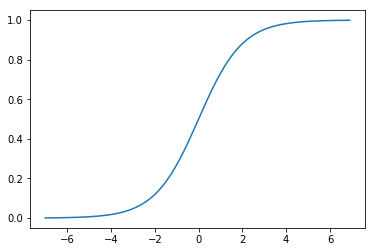

In [5]:
plt.plot(z, fun_z)

In [8]:
def cost_1(z):
    return -np.log(sigmoid(z))

In [9]:
def cost_0(z):
    return -np.log(1-sigmoid(z))

In [10]:
z = np.arange(-10, 10, 1)

In [11]:
phi_z = sigmoid(z)

In [12]:
c1 = [cost_1(z) for x in z]

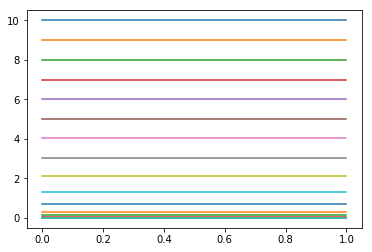

In [15]:
plt.plot(phi_z, c1,  label='J(w) if y=1')

In [16]:
c0 = [cost_0(x) for x in z ]

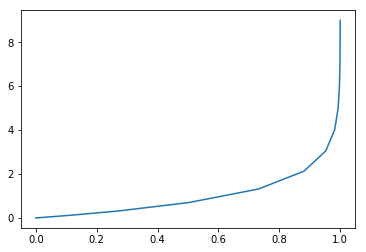

In [17]:
plt.plot(phi_z, c0,  label='J(w) if y=1')

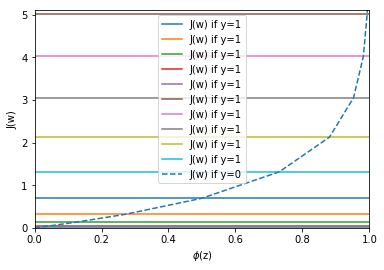

In [18]:
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,  
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


In [19]:
class LogisticRegression(object):
    def __init__(self, eta=0.5, n_iter=100, random_state=196):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        #compute sigmoid activation
        return 1.0 /(1.0+np.exp(-np.clip(z, -250, 250)))
        
    def fit(self, X, y):
        #intialize weights
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1+X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
        # calculated logistic cost instead os squared error cost
        cost = (-y.dot(np.log(output)) - 
                ((1-y).dot(np.log(1-output))))
        self.cost_.append(cost)
        
        return self
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    

In [22]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('class labels:', np.unique(y))

class labels: [0 1 2]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=196, stratify=y)

In [32]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
Y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [34]:
logits = LogisticRegression(eta=0.05, n_iter=1000, random_state=196)

In [35]:
logits.fit(X_train_01_subset, Y_train_01_subset)

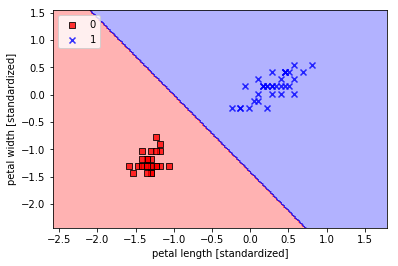

In [36]:
plot_decision_regions(X=X_train_01_subset,y=Y_train_01_subset,classifier=logits)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Using sklearn Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

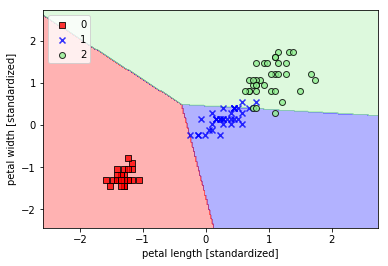

In [42]:
plot_decision_regions(X=X_train_std,y=y_train,classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [43]:
lr.predict(X_test_std[:3, :])

array([2, 2, 0])

In [44]:
lr.predict_proba(X_test_std[:3,:])

array([[8.54644545e-04, 2.93957133e-01, 7.05188223e-01],
       [1.14752882e-03, 2.75048466e-01, 7.23804006e-01],
       [7.97880037e-01, 2.01709956e-01, 4.10007489e-04]])

In [45]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [46]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 2, 0])

## Overfitting

In [48]:
weights, param = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.0**c, random_state=196)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    param.append(10.0**c)

In [50]:
weights = np.array(weights)

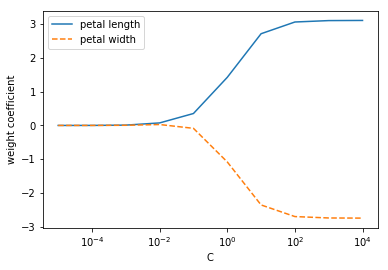

In [53]:
plt.plot(param, weights[:, 0], label='petal length')
plt.plot(param, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

####  the weight coefficients shrink if we decrease parameter C, that is, if we increase the regularization strength